In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib as plt
import re
import os

In [2]:
# Change directory to set up workspace
os.chdir(r'SETDIR')

In [3]:
# Choose positions and countries to select players from 
countries = ['United States', 'Sweden']  # Edit to select from desired countries
positions = ['LW', 'C', 'RW']            # Edit to select from desired positions 

In [4]:
# Read countries shapefile 
countriesSHP = gpd.read_file('Countries_WGS84.shp')

In [5]:
# View Countries shapefile
countriesSHP.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


<AxesSubplot:>

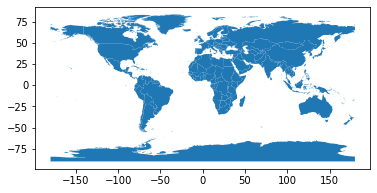

In [6]:
# Plot countries shapefile
countriesSHP.plot()

In [7]:
# Read roster shapefile
players = gpd.read_file('nhlrosters.shp')

In [8]:
# View rosters shapefile
players.head()

,season,teamID,playerID,jerseyNumb,position,firstName,lastName,birthDate,birthCity,lat,lon,height,weight,alternateC,captain,rookie,shootsCatc,primaryPos,geometry
0,20222023,NJD,8473541,45,G,Jonathan,Bernier,1988-08-07,Laval,45.606649,-73.712409,"6' 0""",185,False,False,False,L,G,POINT (-73.71241 45.60665)
1,20222023,NJD,8476292,18,LW,Ondrej,Palat,1991-03-28,Frydek-Mistek,49.681930,18.367322,"6' 0""",194,True,False,False,L,LW,POINT (18.36732 49.68193)
2,20222023,NJD,8474090,2,D,Brendan,Smith,1989-02-08,Mimico,43.618328,-79.511120,"6' 2""",200,False,False,False,L,D,POINT (-79.51112 43.61833)
3,20222023,NJD,8475193,90,LW,Tomas,Tatar,1990-12-01,Ilava,48.996227,18.233277,"5' 10""",173,False,False,False,L,LW,POINT (18.23328 48.99623)
4,20222023,NJD,8475287,56,LW,Erik,Haula,1991-03-23,Pori,61.485139,21.797418,"5' 11""",191,False,False,False,L,LW,POINT (21.79742 61.48514)


<AxesSubplot:>

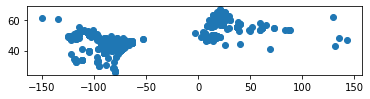

In [9]:
# Plot rosters shapefile 
players.plot()

C:\Users\joefa\anaconda3\envs\AC37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joefa\anaconda3\envs\AC37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joefa\anaconda3\envs\AC37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joefa\anaconda3\envs\AC37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joefa\anaconda3\envs\AC37\lib\site-packages

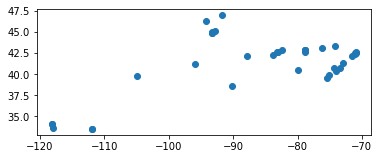

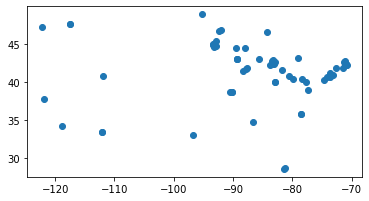

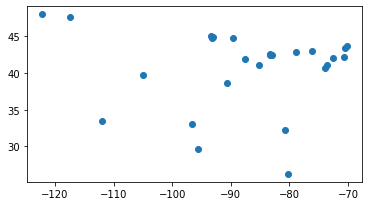

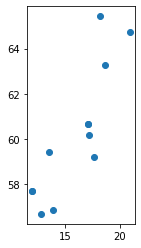

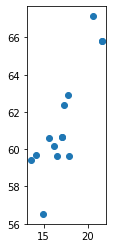

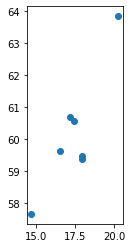

In [36]:
# Loop through list of countries, for each country, loop through positions, extract players from each country in each position and
# create new shapefiles for them. Add two new columns to show heights and weights in metric units

for country in countries:
    countrySHP = countriesSHP[countriesSHP['CNTRY_NAME']== country]
    for pos in positions:
        positionSHP = players[players['position'] == pos]
        newSHP = gpd.sjoin(positionSHP, countrySHP)
        country = country.replace(' ', '')
        newSHP['weight_kg'] = round(newSHP['weight'] * 0.453592, 2)
        newSHP['height_cm'] = (((newSHP['height'].str[0]).astype(int)*12)  + (newSHP['height'].str[-2:-4:-1]).astype(int))*2.54
        newSHPname = country + pos + '.shp'
        ax = newSHP.plot()
        newSHP.to_file(newSHPname)

        


In [37]:
newSHP.head()

,season,teamID,playerID,jerseyNumb,position,firstName,lastName,birthDate,birthCity,lat,...,captain,rookie,shootsCatc,primaryPos,geometry,index_right,OBJECTID,CNTRY_NAME,weight_kg,height_cm
108,20222023,PIT,8476483,67,RW,Rickard,Rakell,1993-05-05,Sundbyberg,59.367047,...,False,False,R,RW,POINT (17.96631 59.36705),210,211,Sweden,88.45,185.42
248,20222023,TOR,8480995,29,RW,Pontus,Holmberg,1999-03-09,Vasteras,59.609901,...,False,True,L,RW,POINT (16.54481 59.60990),210,211,Sweden,91.63,182.88
255,20222023,CAR,8475855,71,RW,Jesper,Fast,1991-12-02,Nassjo,57.653036,...,False,False,R,RW,POINT (14.69672 57.65304),210,211,Sweden,86.64,185.42
275,20222023,FLA,8471887,70,RW,Patric,Hornqvist,1987-01-01,Sollentuna,59.454122,...,False,False,R,RW,POINT (17.92430 59.45412),210,211,Sweden,85.73,180.34
505,20222023,EDM,8479344,13,RW,Jesse,Puljujarvi,1998-05-07,Alvkarleby,60.568607,...,False,False,R,RW,POINT (17.44891 60.56861),210,211,Sweden,91.17,193.04
